### Distribution
- uniform
- Normal
- Bernoulli
- Binomial


# Uniform distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

50 random x values : [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
Sample mean: 4.94
Sample std dev: 2.88
Bin 1: Range [0.0, 1.0) - Count: 1031
Bin 2: Range [1.0, 2.0) - Count: 1012
Bin 3: Range [2.0, 3.0) - Count: 1008
Bin 4: Range [3.0, 4.0) - Count: 1006
Bin 5: Range [4.0, 5.0) - Count: 1018
Bin 6: Range [5.0, 6.0) - Count: 1033
Bin 7: Range [6.0, 7.0) - Count: 1005
Bin 8: Range [7.0, 8.0) - Count: 922
Bin 9: Range [8.0, 9.0) - Count: 1002
Bin 10: Range [9.0, 10.0) - Count: 963


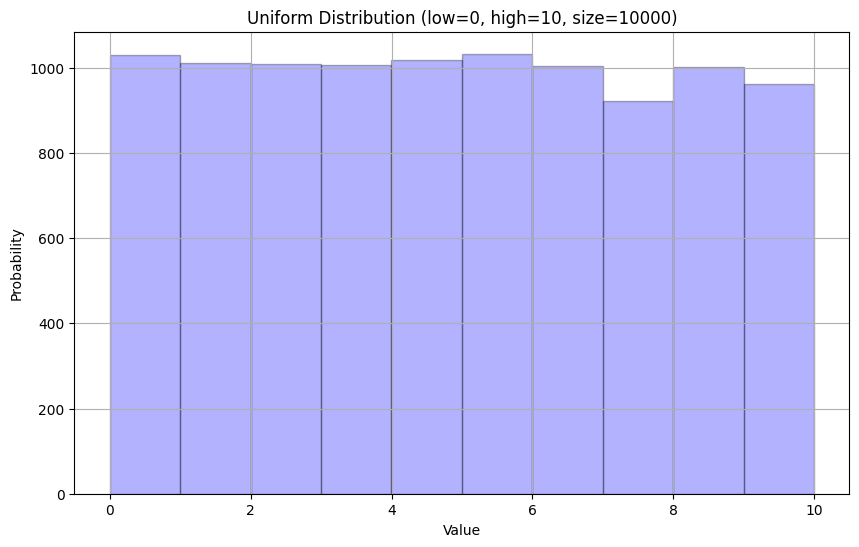

In [12]:

np.random.seed(42) # Set seed for reproducibility

# Parameters
low  = 0     # Lower bound of the distribution
high = 10    # Upper bound of the distribution
size = 10000 # Number of samples

# Generate uniform-distributed data
x = np.random.uniform(low=low, high=high, size=size)
print(f"50 random x values : {x[:50]}")

# Display basic info
print(f"Sample mean: {np.mean(x):.2f}")
print(f"Sample std dev: {np.std(x):.2f}")

# Plot histogram
bins= int(size/1000) # I want 10 bins. This can be increaed to high number, but comment out the prit stmt.
counts, bin_edges = np.histogram(x, bins=bins) # Compute histogram counts and bin edges

# Print bin ranges and counts
for i in range(len(counts)):
    print(f"Bin {i+1}: Range [{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f}) - Count: {counts[i]}")


plt.figure(figsize=(10, 6))

# OPTION1: comment out OPTION2 and uncomment this to see frequency count
plt.hist(x, bins=bins, density=False, alpha=0.3, edgecolor='black',label='Empirical PDF (Histogram)', color='blue') 

plt.title(f'Uniform Distribution (low={low}, high={high}, size={size})')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


# 1. NORMAL DISTRIBUTION

In [2]:

#############STEP1) Lets generate fake data first
np.random.seed(42) # Set seed for reproducibility

mean    = 2
std_dev = 4
size    = 100 # NOTE: If you increase to 1000, ur mean and std_dev would be start matching

# this could be temperature measure in a city
x = np.random.normal(loc=mean, scale=std_dev, size=size)
x = np.round(x,0).astype(int)
print(f"x sorted: {np.sort(x)}")
print(f"Sample mean: {np.mean(x):.2f}")
print(f"Sample std dev: {np.std(x):.2f}")

x sorted: [-8 -6 -6 -6 -5 -5 -4 -4 -4 -4 -3 -3 -3 -3 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  6  7  8  8  8
  8  8  8  9]
Sample mean: 1.52
Sample std dev: 3.59


Bin 1: Range [-8.0, -6.3) - Count: 1
Bin 2: Range [-6.3, -4.6) - Count: 5
Bin 3: Range [-4.6, -2.9) - Count: 8
Bin 4: Range [-2.9, -1.2) - Count: 4
Bin 5: Range [-1.2, 0.5) - Count: 20
Bin 6: Range [0.5, 2.2) - Count: 22
Bin 7: Range [2.2, 3.9) - Count: 14
Bin 8: Range [3.9, 5.6) - Count: 11
Bin 9: Range [5.6, 7.3) - Count: 8
Bin 10: Range [7.3, 9.0) - Count: 7


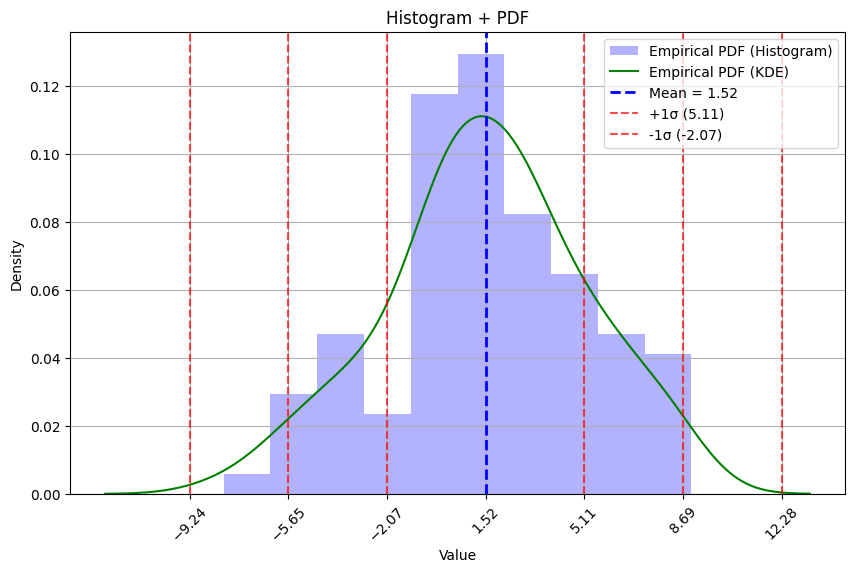

In [15]:
##############STEP2) plot histogram
bins= int(size/10) # I want 10 bins
counts, bin_edges = np.histogram(x, bins=bins) # Compute histogram counts and bin edges

# Print bin ranges and counts
for i in range(len(counts)):
    print(f"Bin {i+1}: Range [{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f}) - Count: {counts[i]}")

In [ ]:

plt.figure(figsize=(10, 6))

plt.hist(x, bins=bins, density=True, alpha=0.3, label='Empirical PDF (Histogram)', color='blue')
sns.kdeplot(x, label='Empirical PDF (KDE)', color='green')

mean_val = np.mean(x)
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')

 # ±1σ, ±2σ, ±3σ lines
std_val = np.std(x)
for i in range(1, 4):
    plt.axvline(mean_val + i * std_val, color='red', linestyle='--', alpha=0.7,
                label=f'+{i}σ ({mean_val + i*std_val:.2f})' if i == 1 else None)
    plt.axvline(mean_val - i * std_val, color='red', linestyle='--', alpha=0.7,
                label=f'-{i}σ ({mean_val - i*std_val:.2f})' if i == 1 else None)


# --- Add std values as x-ticks ---

# Add mean ±1σ, ±2σ, ±3σ
extra_ticks = [mean_val] + [mean_val + i * std_val for i in range(1, 4)] + [mean_val - i * std_val for i in range(1, 4)]

# Combine and sort
all_ticks = sorted(set(np.round(extra_ticks,2)))
plt.xticks(all_ticks, rotation=45)  # rotate for readability

plt.title('Histogram + PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# empirical rule:
# 68% of data lies between (1.52-3.59 =) -2.07 and (1.52+3.59 =)+5.11
# 95% of data lies between -5.65 and +8.69

In [17]:
# Lets verify above Empirical rule:
# Define the range
lower = -2.07 
upper = +5.11

# Boolean mask: True where element is within the range [lower, upper]
mask = (x >= lower) & (x <= upper)
count_in_range = np.sum(mask) # Count how many elements satisfy the condition
percentage = (count_in_range / len(x)) * 100

print(f"Percentage of values between {lower} and {upper}: {percentage:.2f}%")

Percentage of values between -2.07 and 5.11: 71.00%


In [18]:
# Lets verify above Empirical rule:
# Define the range
lower = -5.65
upper = +8.69

# Boolean mask: True where element is within the range [lower, upper]
mask = (x >= lower) & (x <= upper)
count_in_range = np.sum(mask) # Count how many elements satisfy the condition
percentage = (count_in_range / len(x)) * 100

print(f"Percentage of values between {lower} and {upper}: {percentage:.2f}%")

Percentage of values between -5.65 and 8.69: 95.00%


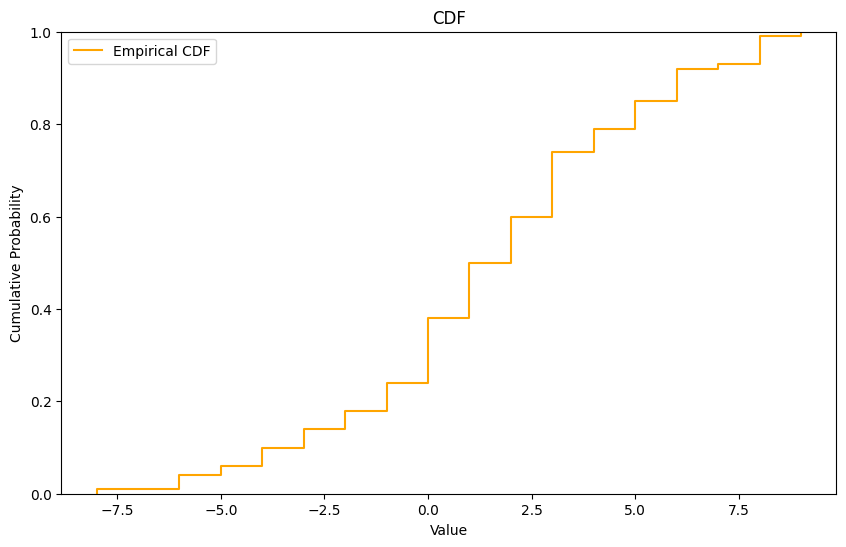

In [6]:
#########STEP3) Plot CDF on a separate plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(x, label='Empirical CDF', color='orange')
plt.title('CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# 2. BERNOULLI DISTRIBUTION (Single Trial)

A Bernoulli distribution is a special case of the Binomial distribution with  n=1.

x: [1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1]
Sample mean: 0.70
Sample std dev: 0.46
counts: [30 70]


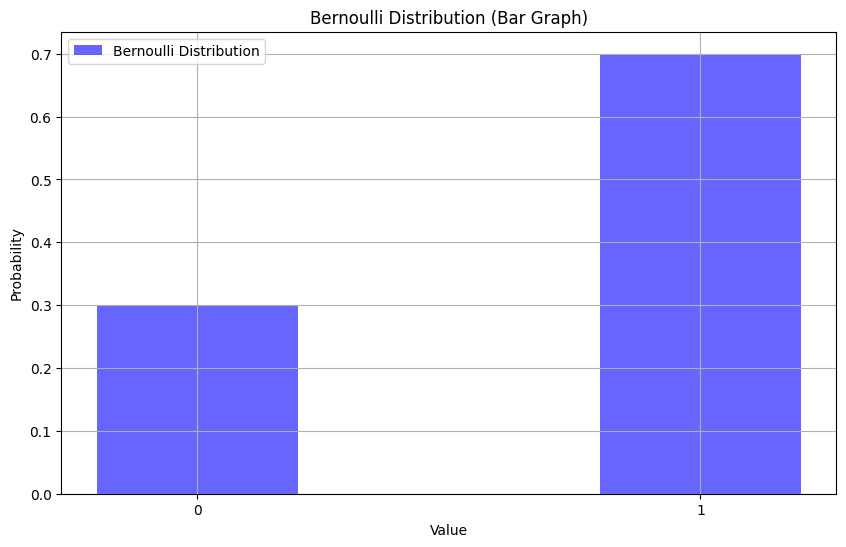

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
p = 0.7  # Probability of success (1)
size = 100  # Number of trials

# Generate Bernoulli distribution (n=1, so binomial = bernoulli)
x = np.random.binomial(n=1, p=p, size=size)
print(f"x: {x}")

# Print sample mean and std dev
print(f"Sample mean: {np.mean(x):.2f}")
print(f"Sample std dev: {np.std(x):.2f}")

# Count occurrences of 0 and 1
counts = np.bincount(x)
print(f"counts: {counts}")


# Plot bar graph of Bernoulli distribution
plt.figure(figsize=(10, 6))
plt.bar(x=[0, 1],
        height = counts / size, # gives prob for each 0 and 1
        alpha=0.6, 
        color='blue', 
        width=0.4, 
        label="Bernoulli Distribution")

# Add grid, title, and labels
plt.grid(True)
plt.title('Bernoulli Distribution (Bar Graph)')
plt.xlabel('Value')
plt.ylabel('Probability')

# Set x-ticks for 0 and 1
plt.xticks([0, 1])

# Show plot
plt.legend()
plt.show()

# 3. BINOMIAL DISTRIBUTION
### What is happening here?
- size = 100: Number of experiments.

You're simulating 100 separate experiments. Think of each experiment as tossing a biased coin 10 times.

- n = 10: Number of trials per experiment

In each experiment, you perform 10 independent trials — like flipping the coin 10 times.

- p = 0.5: Probability of success in each trial

Each individual trial has a 50% chance of success (e.g., getting heads if it's a fair coin). You can change this. 

### What does np.random.binomial(n, p, size) do?
For each of the 100 experiments, it:

Repeats a trial n = 10 times.

In each trial, it records a 1 (success) with probability p = 0.5, otherwise 0 (failure).

Then it counts how many successes (i.e., how many 1s) occurred in those 10 trials.

So each value in the resulting array x will be an integer from 0 to 10 — **representing the number of successes in 10 trials for that 1 experiment**.

Sorted x: [1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8]
frequencies: [ 0  1  5 16 23 21 19  9  6  0  0]
probabilities: [0.   0.01 0.05 0.16 0.23 0.21 0.19 0.09 0.06 0.   0.  ]


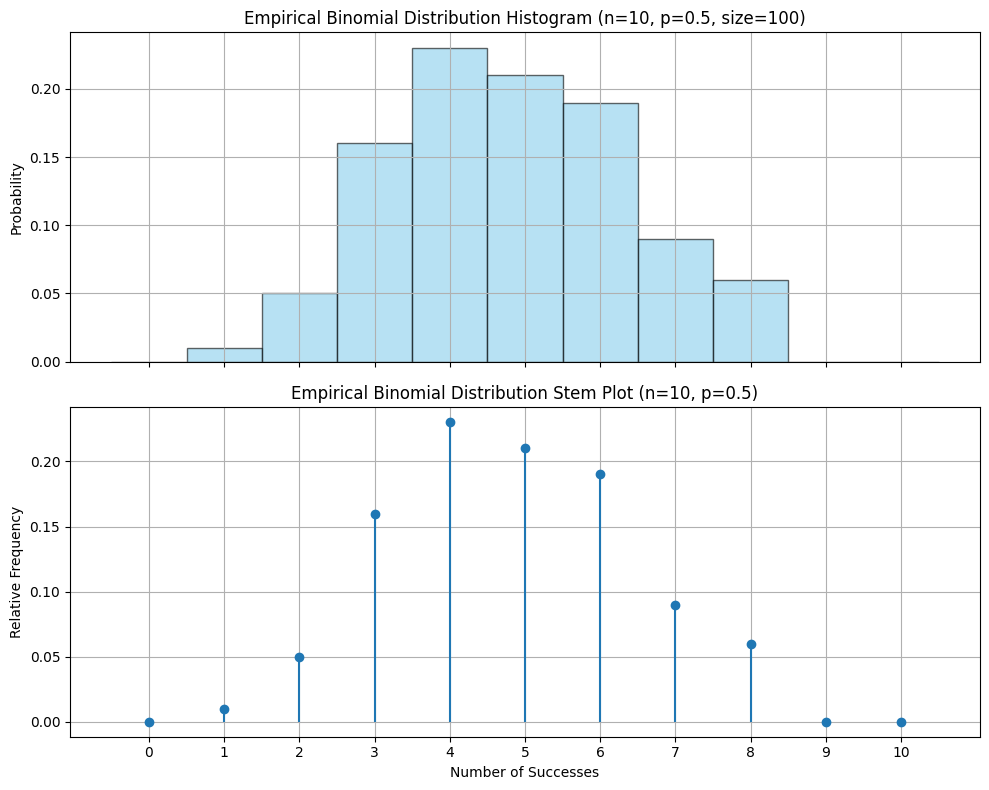

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
n = 10       # Number of trials per experiment
p = 0.5     # Probability of success in each trial. NOTE: change this to see
size = 100  # Number of experiments

# Generate binomial data
x = np.random.binomial(n=n, p=p, size=size)
x_sorted = np.sort(x)
print(f"Sorted x: {x_sorted}")

# Count frequencies of outcomes (0 to n)
x_vals = np.arange(0, n+1)
frequencies = np.array([(x == k).sum() for k in x_vals]) # count how many 0, 1, 2, 3,.., 10 are there in x
print(f"frequencies: {frequencies}")
probabilities = frequencies / size  # Normalize to get relative frequency
print(f"probabilities: {probabilities}")


# Create subplots (2 rows, 1 column), share x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Histogram plot (top)
ax1.hist(x, bins=np.arange(-0.5, n + 1.5, 1), density=True, 
         alpha=0.6, color='skyblue', edgecolor='black')
ax1.set_title(f'Empirical Binomial Distribution Histogram (n={n}, p={p}, size={size})')
ax1.set_ylabel('Probability')
ax1.grid(True)

# Stem plot (bottom)
ax2.stem(x_vals, probabilities, basefmt=" ")
ax2.set_title(f'Empirical Binomial Distribution Stem Plot (n={n}, p={p})')
ax2.set_xlabel('Number of Successes')
ax2.set_ylabel('Relative Frequency')
ax2.set_xticks(x_vals)
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# (OPTIONAL) Poisson Distribution

Sample mean: 4.01
Sample std dev: 2.11


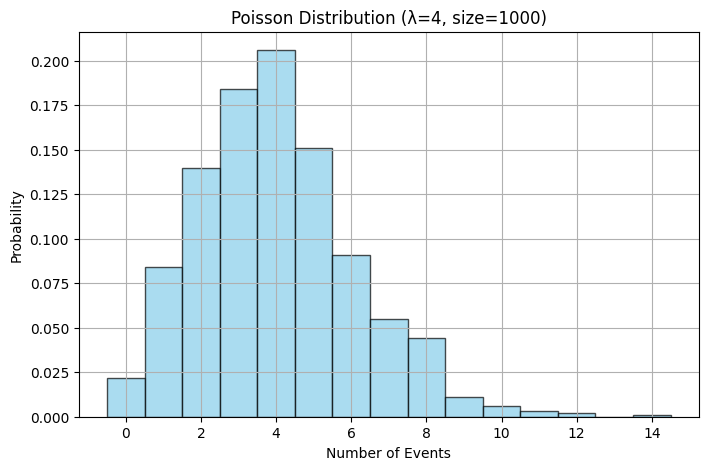

In [19]:
# Parameters
lam  = 4       # λ (average rate of occurrence)
size = 1000   # Number of samples

# Generate Poisson-distributed data
data = np.random.poisson(lam=lam, size=size)

# Display basic info
print(f"Sample mean: {np.mean(data):.2f}")
print(f"Sample std dev: {np.std(data):.2f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=np.arange(data.min() - 0.5, data.max() + 1.5, 1),
         color='skyblue', edgecolor='black', density=True, alpha=0.7)
plt.title(f'Poisson Distribution (λ={lam}, size={size})')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


## (Central Limit Theorem):

No matter what the original distribution of data is, **the distribution of the sample means will always tend to be normal (Gaussian) as the number of samples increases (usually n ≥ 30), provided the samples are independent and identically distributed (i.i.d.)**.

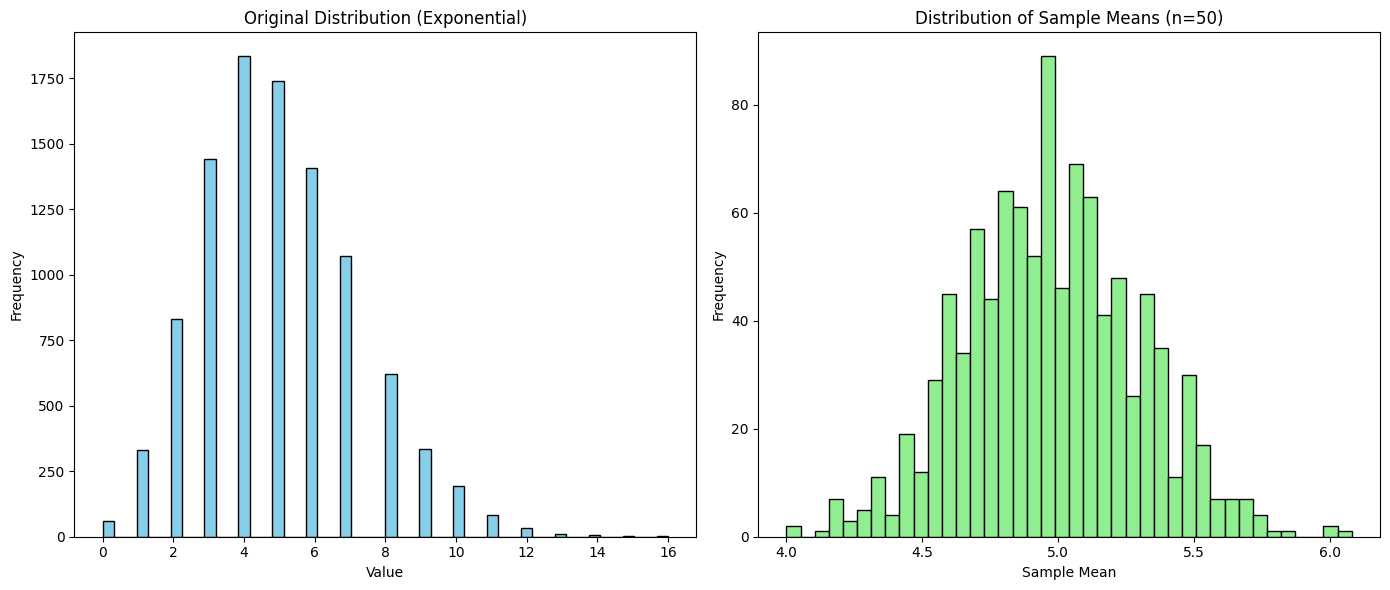

In [23]:
# TODO Try changing the distribution of the population and also try different sample_size(5, 30, 100),

import numpy as np
import matplotlib.pyplot as plt
SIZE = 10000

# Step 1: Original distribution (non-normal)
# population = np.random.exponential(scale=2, size=SIZE)

# population = np.random.normal(loc=0, scale=1, size=100000) 
# population = np.random.uniform(low=0, high=10, size=SIZE)
population = np.random.poisson(lam=5, size=SIZE)
# population = np.random.binomial(n=10, p=0.5, size=100000)
# population = np.random.beta(a=2, b=5, size=SIZE)
# population = np.random.gamma(shape=2, scale=2, size=100000)

# print(f"population: {population}")


# Step 2: Take many samples and compute their means
sample_means = []
sample_size = 50  # Size of each sample

for _ in range(1000):  # 1000 trials
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Step 3: Plot original distribution and distribution of sample means
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='skyblue', edgecolor='black')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, color='lightgreen', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


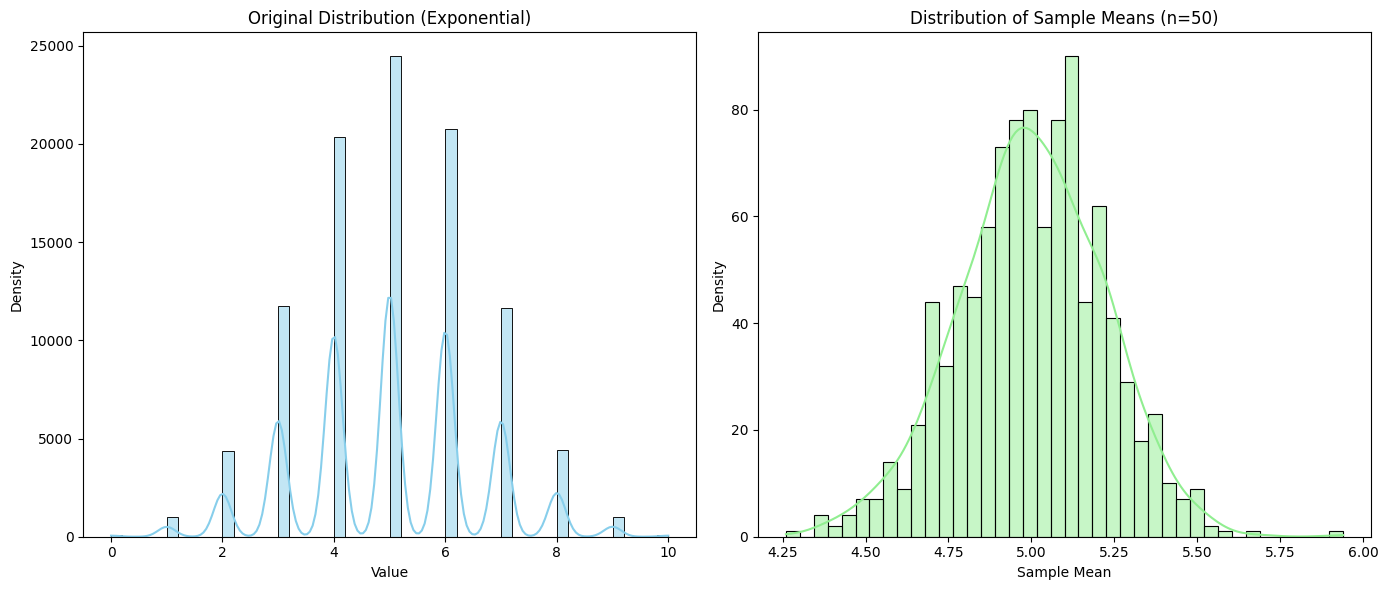

In [22]:
# Now lets put KDE curve on it
# TODO Try changing the distribution of the population and also try different sample_size(5, 30, 100),

SIZE = 10000

# Step 1: Original distribution (non-normal)
# population = np.random.exponential(scale=2, size=SIZE)

# population = np.random.normal(loc=0, scale=1, size=100000) 
# population = np.random.uniform(low=0, high=10, size=SIZE)
# population = np.random.poisson(lam=5, size=SIZE)
population = np.random.binomial(n=10, p=0.5, size=100000)
# population = np.random.beta(a=2, b=5, size=SIZE)
# population = np.random.gamma(shape=2, scale=2, size=100000)

# print(f"population: {population}")


# Step 2: Take many samples and compute their means
sample_means = []
sample_size = 50  # Size of each sample

for _ in range(1000):  # 1000 trials
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Step 3: Plot original distribution and distribution of sample means
# Step 3: Plot with histogram + KDE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='skyblue')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=40, kde=True, color='lightgreen')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()